<a href="https://colab.research.google.com/github/ShashwatVv/naiveDL/blob/main/Simple_Regression_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

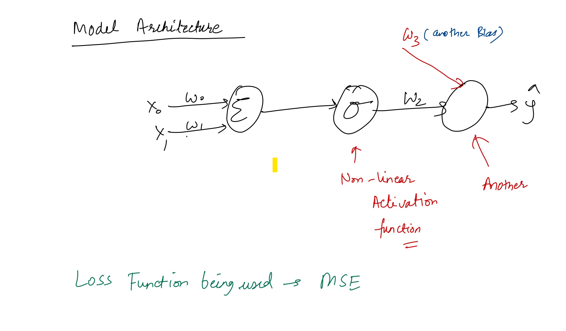

## Let's implement a simple ANN based architecture that performs simple Linear Regression.

In [2]:
## importing libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

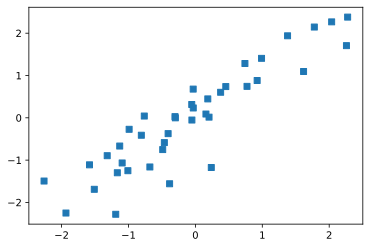

In [29]:
N = 40 ##number_of_points
##create x values
x = torch.randn(N,1) ## ---> x is a vector of the form (N X 1)
##create ground truth/target values
y = x + torch.randn(N,1)/2

plt.plot(x, y, 's')

##POINT --> everytime this cell would  be run, we will get different plots... as the points are being selected at random

In [ ]:
## torch.randn(N,1) creates a column vector, torch.randn(1,N) creates a row vector :--> quick ref


#### What information do we have before creating the model?
- Number of inputs - 1 (-->x as mentioned previous cell)
- The activation function 
- Number of outputs - 1(-->y as mentioned in previous cell)


In [30]:
## implementing model based on the architecture provided in the image, neglecting the biases for now
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid(), nn.Linear(1,1))

model


Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [31]:
## Let's set the parameters
learning_rate  = 0.5
loss_fun  = nn.MSELoss() ## as mentioned in the image

## we will use Stochastic Gradient Descent 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


In [32]:
num_epochs = 500
## each epoch comprises of passing all the instances in the feature space  
## create a tensor of losses for each epoch. initialize 'em all with 0
loss_list = torch.zeros(num_epochs)

## let's iterate through each epochs

for ith_epoch in range(num_epochs):

  ##Forward propagation

  y_hat = model(x) ##predicted

  loss = loss_fun(y_hat, y) ##-> Loss function is Mean Squared Error

  loss_list[ith_epoch] = loss
  
  ##Backward prop
  optimizer.zero_grad() ##intialize all gradient to zero
  loss.backward()
  optimizer.step()

print('Trained')

Trained


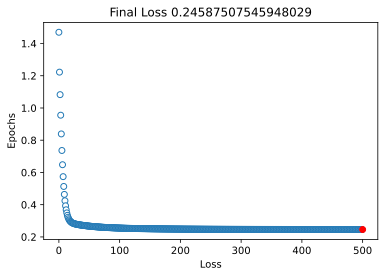

In [51]:

## Let's predict on the whole dataset itself
## we haven't done any train-test split for now

predicted = model(x)

##our own loss_fun created
test_loss = (predicted-y).pow(2).mean()

## Plotting
plt.plot(loss_list.detach(), 'o', markerfacecolor= 'w', linewidth=1 )
plt.plot(num_epochs, test_loss.detach(), 'ro')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title(f'Final Loss {test_loss.item()}') ##print the last loss after training the last epoch
plt.show()


In [34]:
## Wait what, loss has estabilized after just 50 or 60 odd epochs??

Text(0.5, 1.0, 'Final Loss 0.24587507545948029')

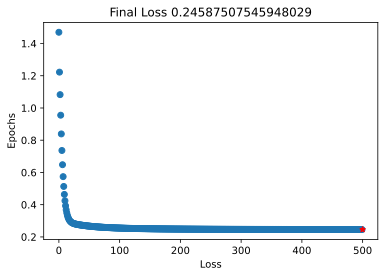

In [43]:
plt.plot(loss_list.detach(), 'o')
plt.plot(num_epochs, test_loss.detach(), 'r*')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title(f'Final Loss {test_loss.item()}')

In [49]:
## Why detach() was used?
print(test_loss)

tensor(0.2459, grad_fn=<MeanBackward0>)


In [50]:
## The second info --> grad_fn: gradient function, we don't need for now

print(test_loss.detach())

tensor(0.2459)
